<a href="https://colab.research.google.com/github/Warmuz/AntSystem/blob/main/mr%C3%B3weczki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Task 1
import numpy as np
#number of decision choices
Rm1=0
Lm1=0
Rm2=0
Lm2=0
k=20      #parameter
d=2       #parameter
ants=50
for z in range(0,2):
  for x in range(0,ants):
    r1=np.random.uniform(0,1)         #uniform distribution in the interval [0, 1]
    Pr1=((Rm1+k)**d)/((Rm1+k)**d+(Lm1+k)**d)  #The probability with which the (m + 1)-th ant selects the right branch
    if r1<=Pr1:
      Rm1+=1
    else:
      Lm1+=1
    r2=np.random.uniform(0,1)
    Pr2=((Rm1+k)**d)/((Rm1+k)**d+(Lm1+k)**d)
    if r2<=Pr2:
      Rm2+=1
    else:
      Lm2+=1
    
print ('Right branch=',Rm1,'Left branch=',Lm1)
print ('Right branch=',Rm2,'Left branch=',Lm2)

Right branch= 46 Left branch= 54
Right branch= 50 Left branch= 50


In [ ]:
#Task 2

#length of path
Rl1=7
Ll1=3

if Rl1<Ll1:
  print('1 Right path is shorter')
else:
  print('1 Left path is shorter')
Rl2=3
Ll2=7

if Rl2<Ll2:
  print('2 Right path is shorter')
else:
  print('2 Left path is shorter')


Rm1=0
Lm1=0
Rm2=0
Lm2=0
#amount pheromone on paths
Rf1=0
Lf1=0
Rf2=0
Lf2=0 

#amont pheromone, if the branch is longer ants put less amount of pheromon
Sum1=Rl1+Ll1
r1=1-Rl1/Sum1
l1=1-Ll1/Sum1

Sum2=Rl2+Ll2
r2=1-Rl2/Sum2
l2=1-Ll2/Sum2

for z in range(0,2):
  for x in range(0,ants):
    ra=np.random.uniform(0,1)             #uniform distribution in the interval [0, 1]
    Pr1=((Rf1+k)**d)/((Rf1+k)**d+(Lf1+k)**d)    #The probability with which the (m + 1)-th ant selects the right branch
    if ra<Pr1:    
      Rm1=Rm1+1
      Rf1=Rf1+r1
    else:
      Lm1=Lm1+1
      Lf1=Lf1+l1

    rb=np.random.uniform(0,1)
    Pr2=((Rf2+k)**d)/((Rf2+k)**d+(Lf2+k)**d)
    if rb<Pr2:    
      Rm2=Rm2+1
      Rf2=Rf2+r2
    else:
      Lm2=Lm2+1
      Lf2=Lf2+l2

print('1 Right path',Rm1,'1 Left path',Lm1)
print('2 Right path',Rm2,'2 Left path',Lm2)


1 Left path is shorter
2 Right path is shorter
1 Right path 30 1 Left path 70
2 Right path 69 2 Left path 31


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


,0,1,2,3,4,5,6,7,8,9
0,0.000000,4.242641,7.211103,7.280110,15.033296,12.369317,16.643317,10.295630,10.630146,9.000000
1,4.242641,0.000000,3.162278,4.123106,12.649111,9.000000,12.529964,6.324555,6.403124,6.708204
2,7.211103,3.162278,0.000000,2.236068,10.295630,6.082763,9.433981,3.162278,4.123106,7.810250
3,7.280110,4.123106,2.236068,0.000000,8.544004,5.099020,9.899495,3.605551,6.000000,9.899495
4,15.033296,12.649111,10.295630,8.544004,0.000000,5.000000,10.049876,8.485281,12.041595,18.027756
5,12.369317,9.000000,6.082763,5.099020,5.000000,0.000000,6.324555,3.605551,7.071068,13.416408
6,16.643317,12.529964,9.433981,9.899495,10.049876,6.324555,0.000000,6.403124,7.071068,14.000000
7,10.295630,6.324555,3.162278,3.605551,8.485281,3.605551,6.403124,0.000000,3.605551,9.848858
8,10.630146,6.403124,4.123106,6.000000,12.041595,7.071068,7.071068,3.605551,0.000000,7.071068
9,9.000000,6.708204,7.810250,9.899495,18.027756,13.416408,14.000000,9.848858,7.071068,0.000000


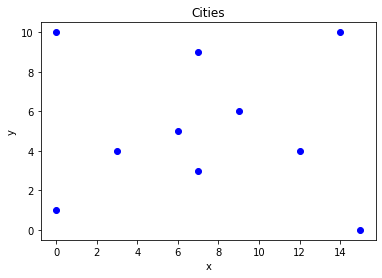

In [ ]:
#Task 3
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas

# city 1
x = [0, 3, 6, 7, 15, 12, 14, 9, 7, 0]
y = [1, 4, 5, 3, 0, 4, 10, 6, 9, 10]

n=len(x)
ants=n

distance=np.zeros([n,n], dtype=float)
ni=np.zeros([n,n], dtype=float)
a=np.zeros([n,n], dtype=float)
T=np.zeros([n,n], dtype=int)
L=np.zeros(ants, dtype=float)

alfa=1
beta=5
Tmax=200
p=0.5

for i in range (0,n):    
  for j in range (0,n):
    distance[i][j]=math.sqrt((x[j]-x[i])**2+(y[j]-y[i])**2)
    ni[i][j]=1/distance[i][j]

t0 = 1/np.amax(distance)
tau = np.full([n,n], t0)


plt.title('Cities')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,'bo')
pandas.DataFrame(distance)


In [ ]:
import copy
for przejscie in range(100):
  roads= [] #tablica drog
  road_lens = [] #tablica dystansow
  Delta_t = np.zeros((n,n)) #zmiana feromonu
  for mrowka in range(n): #kazda mrowka zaczyna podroz
    road_l = 0 #poczatkowa dlugosc drogi
    road = [] #miasta w ktorych mrowka byla
    delta_t = np.zeros((n,n)) #inicjacja zmiany feromonu dla danej mrowki
    curr_city = 0 #wszystkie mrowki 
    for mrowka_decyzja in range(n-1): #wybor mrowki dla kazdego miasta
      #liczenie a (decyzje), kazdy wiersz osobno
      denominator = sum([0 if (j in road or curr_city==j) else (tau[curr_city][j]**alfa)/(distance[curr_city][j]**beta) for j in range(n)])
      d_res = 1/np.array(distance[curr_city])**beta #ni juz do bety
      d_res[curr_city] = 0
      decisions = np.array(tau[curr_city])
      #print(decisions)
      decisions = decisions**alfa
      #print(decisions)
      decisions = [0 if (j in road or curr_city == j) else (decisions[j]*d_res[j])/denominator for j in range(n)]
      #print(decisions)

      #liczenie prawdopodobienstw
      prob = []
      for j in range(n):
        prob.append(decisions[j]/sum(decisions))
      prob = np.array(prob)
      #wybor miasta do ktorego mrowka sie porusza
      prob_pos = 0
      zmienna_wyboru = np.random.uniform(0,1)
      for d in range(n):
        prob_pos += prob[d]
        if zmienna_wyboru < prob_pos:
          wybor = d
          break
      road.append(curr_city)
      road_l += distance[curr_city][wybor]
      delta_t[curr_city][wybor] = 1
      delta_t[wybor][curr_city] = 1
      curr_city = wybor
    road.append(curr_city) #musimy dodac ostatnie miasto bo for idzie do przedostatniego
    road_l += distance[curr_city][wybor]
    road_l += distance[wybor][curr_city]
    road.append(0) #wracamy do poczatkowego miasta
    road_l += distance[curr_city][0] 
    road_l += distance[0][curr_city]
    delta_t *= 1/road_l #feromon to 1/dlugoscDrogi tam gdzie mrowka sie porusza
    Delta_t += delta_t
    roads.append(copy.deepcopy(road)) #dodajemy droge do tablicy drog w danej iteracji
    road_lens.append(road_l) #dlugosc tez
  tau = (1-0.5)*tau + Delta_t #update tau razem z ewaporacja


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


In [ ]:
for i in range(n):
  print(roads[i],road_lens[i])

[0, 1, 2, 3, 7, 5, 4, 6, 8, 9, 0] 64.04410012056726
[0, 1, 2, 3, 7, 5, 4, 6, 8, 9, 0] 64.04410012056726
[0, 1, 2, 3, 7, 5, 4, 6, 8, 9, 0] 64.04410012056726
[0, 1, 2, 3, 7, 5, 4, 6, 8, 9, 0] 64.04410012056726
[0, 1, 2, 3, 7, 5, 4, 6, 8, 9, 0] 64.04410012056726
[0, 1, 2, 3, 7, 5, 4, 6, 8, 9, 0] 64.04410012056726
[0, 1, 2, 3, 7, 5, 4, 6, 8, 9, 0] 64.04410012056726
[0, 1, 2, 3, 7, 5, 4, 6, 8, 9, 0] 64.04410012056726
[0, 1, 2, 3, 7, 5, 4, 6, 8, 9, 0] 64.04410012056726
[0, 1, 2, 3, 7, 5, 4, 6, 8, 9, 0] 64.04410012056726


In [ ]:
def connectpoints(x,y,p1,p2,colour = 'ko-'): 
  x1, x2 = x[p1], x[p2]
  y1, y2 = y[p1], y[p2] 
  plt.plot([x1,x2],[y1,y2],colour)


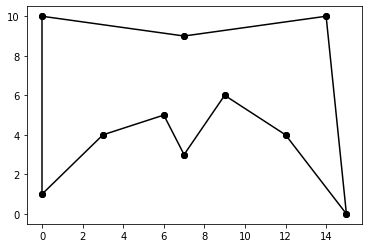

In [ ]:

best_road =  min(road_lens)
best_road = roads[max([i if best_road == road_lens[i] else 0 for i in range(n)])]
for i in range(len(best_road)-1):
    connectpoints(x,y,best_road[i],best_road[i+1])
plt.show()
    

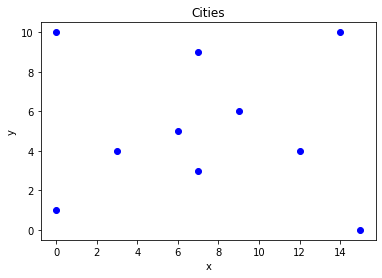

In [ ]:
plt.title('Cities')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,'bo')

For the testing purposes we checked different amount of iterations for the ants. We found out that for about 100 iteration we reliably achieve a closest route possible. For lower amounts there were some roads that were not yet optimized.